Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011 </br>
Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

# 0. Khai báo các thư viện cần dùng

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# 1. Đọc dữ liệu từ file CSV

In [ ]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Chuyển đổi kiểu dữ liệu ngày tháng
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [ ]:
df["Month"] = df.InvoiceDate.dt.month
df["Year"] = df.InvoiceDate.dt.year
df["Total"] = df.UnitPrice * df.Quantity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Month        541909 non-null  int64         
 9   Year         541909 non-null  int64         
 10  Total        541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 45.5+ MB


In [ ]:
# Lấy ra dữ liệu cần thiết
temp = df.loc[:, ["InvoiceNo", "Month", "Year", "Total"]]

In [ ]:
# Lọc ra dữ liệu năm 2011
df1 = temp[temp.Year == 2011]
df1.reset_index(drop = True, inplace = True)
df1

,InvoiceNo,Month,Year,Total
0,539993,1,2011,19.50
1,539993,1,2011,10.50
2,539993,1,2011,10.50
3,539993,1,2011,10.50
4,539993,1,2011,12.50
...,...,...,...,...
499423,581587,12,2011,10.20
499424,581587,12,2011,12.60
499425,581587,12,2011,16.60
499426,581587,12,2011,16.60


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499428 entries, 0 to 499427
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   InvoiceNo  499428 non-null  object 
 1   Month      499428 non-null  int64  
 2   Year       499428 non-null  int64  
 3   Total      499428 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.2+ MB


In [ ]:
# Dataframe chứa doanh thu từng tháng năm 2021
df2 = df1.groupby(["Month"]).sum()
df2.reset_index(inplace = True)
df2

,Month,Year,Total
0,1,70680617,560000.260
1,2,55718777,498062.650
2,3,73900228,683267.080
3,4,60161076,493207.121
4,5,74467330,723333.510
5,6,74153614,691123.120
6,7,79470698,681300.111
7,8,70956124,682680.510
8,9,101004486,1019687.622
9,10,122152162,1070704.670


In [ ]:
# Dataframe chứa số lượng đơn hàng theo từng tháng 2021
temp = df1.copy()
temp.drop_duplicates(subset = "InvoiceNo", keep = "last", inplace = True, ignore_index = True)
df3 = temp.groupby(["Month"]).count()
df3.reset_index(inplace = True)
df3

,Month,InvoiceNo,Year,Total
0,1,1476,1476,1476
1,2,1393,1393,1393
2,3,1983,1983,1983
3,4,1744,1744,1744
4,5,2162,2162,2162
5,6,2012,2012,2012
6,7,1927,1927,1927
7,8,1737,1737,1737
8,9,2327,2327,2327
9,10,2637,2637,2637


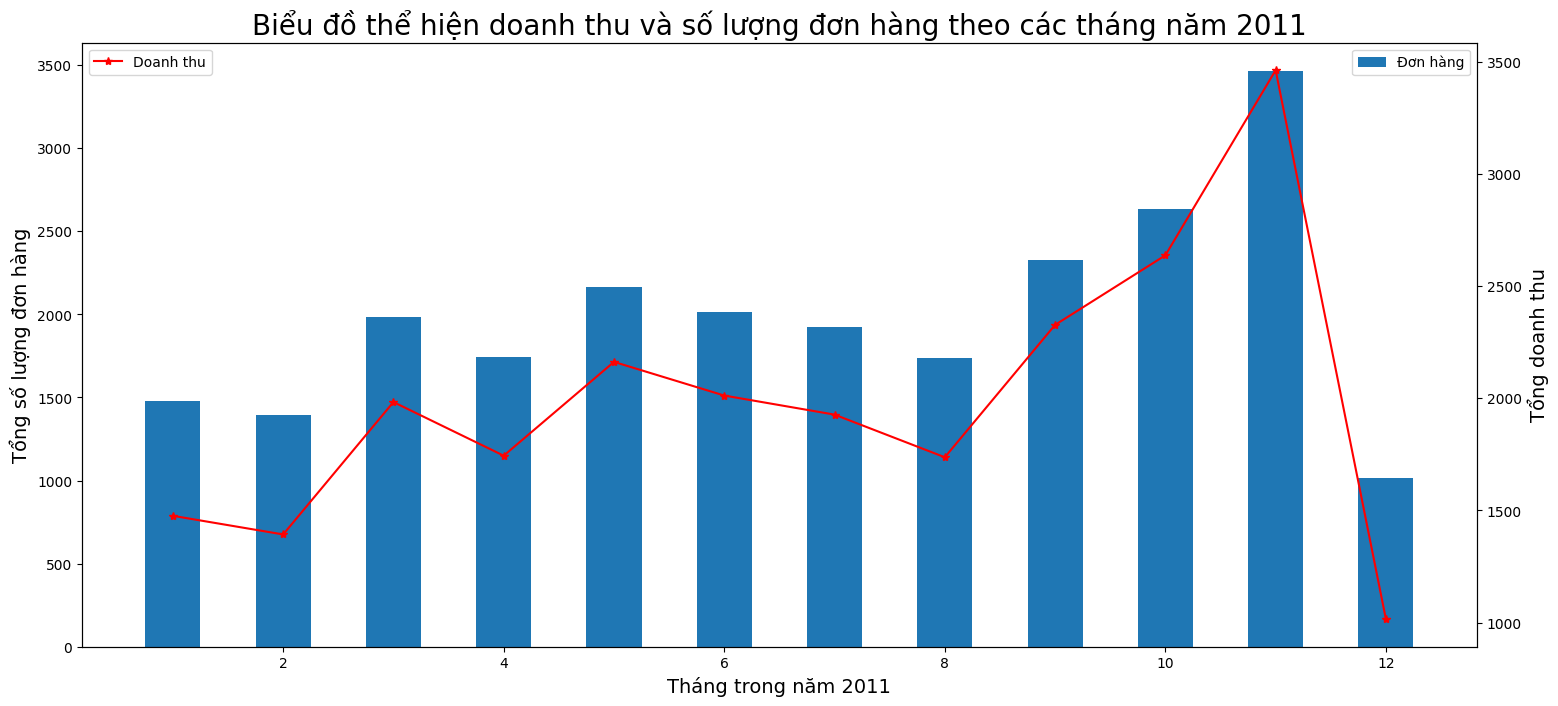

In [ ]:
# Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011
# Biểu đồ cột thể hiện số lượng đơn hàng theo các tháng năm 2011
plt.figure(figsize = (18,8), dpi = 100)
plt.bar(df3.Month, df3.Total, width = 0.5, label = "Đơn hàng")
axes_1 = plt.gca()
axes_2 = axes_1.twinx()
axes_2.plot(df2.Month, df3.Total, marker = "*", color = "red", label = "Doanh thu")
axes_1.set_xlabel("Tháng trong năm 2011", fontsize = 14)
axes_1.set_ylabel("Tổng số lượng đơn hàng", fontsize = 14)
axes_2.set_ylabel("Tổng doanh thu", fontsize = 14)
axes_1.legend(loc = "upper right")
plt.legend(loc = "upper left")
plt.title("Biểu đồ thể hiện doanh thu và số lượng đơn hàng theo các tháng năm 2011", fontsize = 20)
plt.show()
